# Emmitance plots

In [366]:
from pathlib import Path
from LHC_FillingPattern import LHCFillingPattern 
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import pandas as pd

In [367]:
parquet_path = Path(
    "/eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363"
    "/HX:FILLN=10739/"
)
emit_col  = "LHC.BSRT.5R4.B1:BUNCH_EMITTANCE_H"    
bids      = [20, 500, 750, 1250, 1800, 2250, 2874]  


In [368]:
ls /eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363/HX:FILLN=10739

'HX:BMODE=ADJUST'/   'HX:BMODE=INJPROB'/  'HX:BMODE=SQUEEZE'/
'HX:BMODE=FLATTOP'/  'HX:BMODE=PRERAMP'/  'HX:BMODE=STABLE'/
'HX:BMODE=INJPHYS'/  'HX:BMODE=RAMP'/


In [369]:
ls /eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363/

'HX:FILLN=10738'/  'HX:FILLN=10739'/


In [370]:
raw = (
    dd.read_parquet(parquet_path, columns=[emit_col])
      .dropna()          
      .compute()         
)
#Convert index to Timestamp and sort
raw.index = pd.to_datetime(raw.index, unit="ns")
raw.sort_index(inplace=True)

stacked     = np.stack(raw[emit_col].values)             
emit_bunch  = stacked[:, bids]                            
df_emit = pd.DataFrame(
    emit_bunch,
    index = raw.index,
    columns = [f"B{bid}" for bid in bids]            
)

# Horizontal Emittance for Beam 1

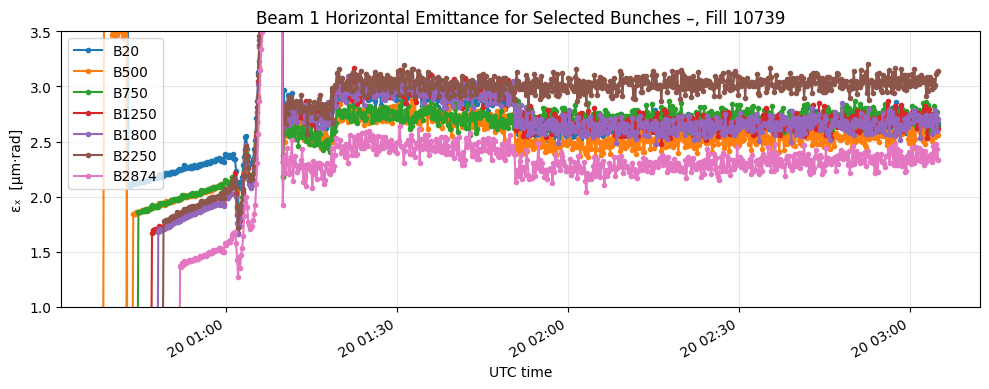

In [371]:
ax = df_emit.plot(figsize=(10,4), marker=".", linestyle="-")
ax.set_title("Beam 1 Horizontal Emittance for Selected Bunches –, Fill 10739")
ax.set_xlabel("UTC time")
ax.set_ylabel("εₓ  [µm·rad]")
ax.grid(alpha=0.3)
ax.set_ylim(1, 3.5)
plt.tight_layout()
plt.show()

# Vertical Emmitance for beam 1

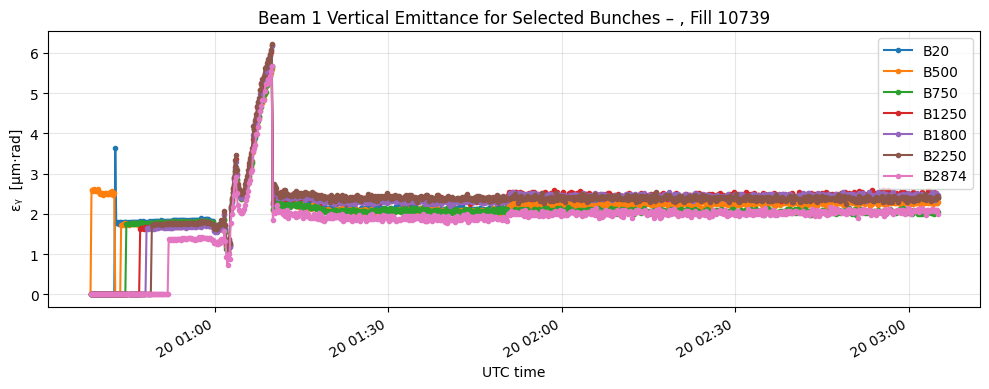

In [372]:
emit_col_v  = "LHC.BSRT.5R4.B1:BUNCH_EMITTANCE_V"  
raw = (
    dd.read_parquet(parquet_path, columns=[emit_col_v])
      .dropna()
      .compute()
)
raw.index = pd.to_datetime(raw.index, unit="ns")
raw.sort_index(inplace=True)
stacked    = np.stack(raw[emit_col_v].values)  
emit_bunch = stacked[:, bids]  
df_emitV = pd.DataFrame(
    emit_bunch,
    index   = raw.index,
    columns = [f"B{bid}" for bid in bids]
)
ax = df_emitV.plot(figsize=(10,4), marker=".", linestyle="-")
ax.set_title("Beam 1 Vertical Emittance for Selected Bunches – , Fill 10739")
ax.set_xlabel("UTC time")
ax.set_ylabel("εᵧ  [µm·rad]")
ax.grid(alpha=0.3)
ax_ex.set_ylim(0, 3)
plt.tight_layout()
plt.show()

# HORIZONTAL EMMITANCE FOR BEAM 2

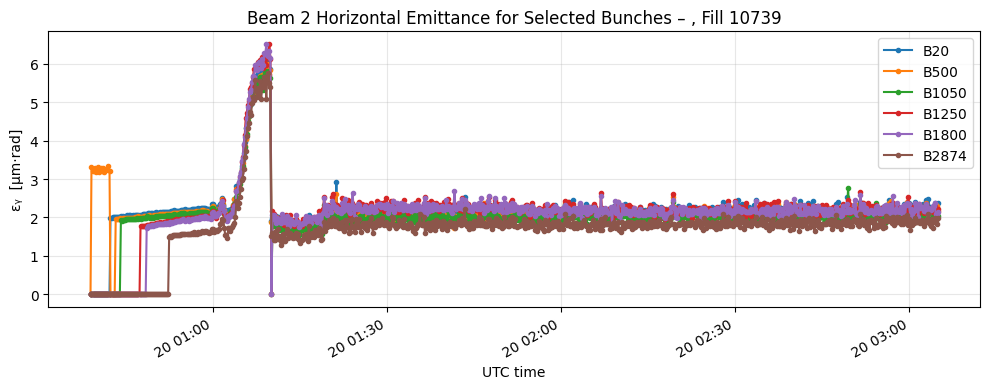

In [373]:
bids      = [20, 500,1050, 1250, 1800, 2874]  
emit_col_v  = "LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_H"  
raw = (
    dd.read_parquet(parquet_path, columns=[emit_col_v])
      .dropna()
      .compute()
)
raw.index = pd.to_datetime(raw.index, unit="ns")
raw.sort_index(inplace=True)
stacked    = np.stack(raw[emit_col_v].values)  
emit_bunch = stacked[:, bids]  
df_emitV = pd.DataFrame(
    emit_bunch,
    index   = raw.index,
    columns = [f"B{bid}" for bid in bids]
)
ax = df_emitV.plot(figsize=(10,4), marker=".", linestyle="-")
ax.set_title("Beam 2 Horizontal Emittance for Selected Bunches – , Fill 10739")
ax.set_xlabel("UTC time")
ax.set_ylabel("εᵧ  [µm·rad]")
ax.grid(alpha=0.3)
ax_ex.set_ylim(0, 3)
plt.tight_layout()
plt.show()

# VERTICAL EMMITANCE FOR BEAM 2

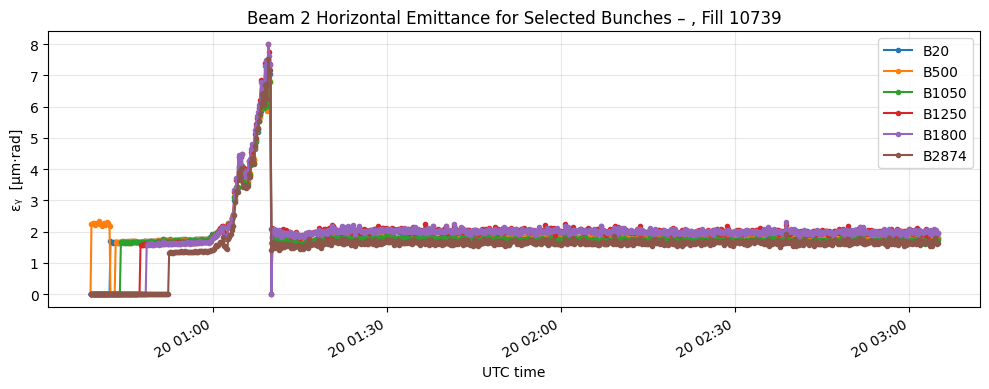

In [374]:
emit_col_v  = "LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_V"  
raw = (
    dd.read_parquet(parquet_path, columns=[emit_col_v])
      .dropna()
      .compute()
)
raw.index = pd.to_datetime(raw.index, unit="ns")
raw.sort_index(inplace=True)
stacked    = np.stack(raw[emit_col_v].values)  
emit_bunch = stacked[:, bids]  
df_emitV = pd.DataFrame(
    emit_bunch,
    index   = raw.index,
    columns = [f"B{bid}" for bid in bids]
)
ax = df_emitV.plot(figsize=(10,4), marker=".", linestyle="-")
ax.set_title("Beam 2 Horizontal Emittance for Selected Bunches – , Fill 10739")
ax.set_xlabel("UTC time")
ax.set_ylabel("εᵧ  [µm·rad]")
ax.grid(alpha=0.3)
ax_ex.set_ylim(0, 3)

plt.tight_layout()
plt.show()

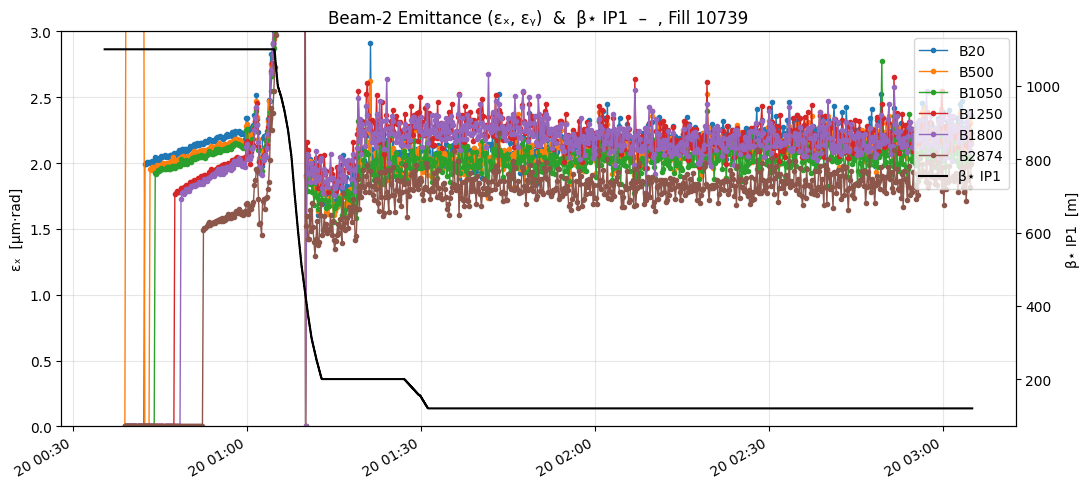

In [375]:
col_ex = "LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_H"   # horizontal ε (Beam-2)
col_ey = "LHC.BSRT.5L4.B2:BUNCH_EMITTANCE_V"   # vertical   ε (Beam-2)
col_bs = "HX:BETASTAR_IP1"                     # β⋆  at IP1 (scalar per row)

bids = [20,500,1050,1250,1800,2874]

def load_bsrtemit(column):
    raw = (
        dd.read_parquet(parquet_path, columns=[column])
          .dropna()
          .compute()
    )
    raw.index = pd.to_datetime(raw.index, unit="ns")
    raw.sort_index(inplace=True)

    # stack the per-row arrays ⇒ (N, 3564) matrix, slice wanted BIDs
    mat   = np.stack(raw[column].values)
    sliced = mat[:, bids]                       # (N_times, len(bids))

    return pd.DataFrame(
        sliced,
        index   = raw.index,
        columns = [f"B{bid}" for bid in bids]
    )

df_ex = load_bsrtemit(col_ex)
df_ey = load_bsrtemit(col_ey)

df_bs = (
    dd.read_parquet(parquet_path, columns=[col_bs])
      .dropna()
      .compute()
)
df_bs.index = pd.to_datetime(df_bs.index, unit="ns")
df_bs.sort_index(inplace=True)


fig, ax_ex = plt.subplots(figsize=(11, 5))


df_ex.plot(ax=ax_ex, linewidth=1, marker='.', legend=False)
ax_ex.set_ylabel("εₓ  [µm·rad]")
ax_ex.set_title("Beam-2 Emittance (εₓ, εᵧ)  &  β⋆ IP1  –  , Fill 10739")
ax_ex.grid(alpha=0.3)

#df_ey.mean(axis=1).plot(ax=ax_ex, color='tab:purple', linestyle='--', label="εᵧ avg")


ax_bs = ax_ex.twinx()
df_bs[col_bs].plot(ax=ax_bs, color='black', linewidth=1.5, label="β⋆ IP1")
ax_bs.set_ylabel("β⋆ IP1  [m]")


handles1, labels1 = ax_ex.get_legend_handles_labels()
handles2, labels2 = ax_bs.get_legend_handles_labels()
ax_ex.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
ax_ex.set_ylim(0, 3)  
plt.tight_layout()
plt.show()


# PLOT ENERGY

In [376]:
DATADIR = Path('/eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363/HX:FILLN=10739/')
fbmodes = pd.read_parquet(DATADIR)


# ATLAS

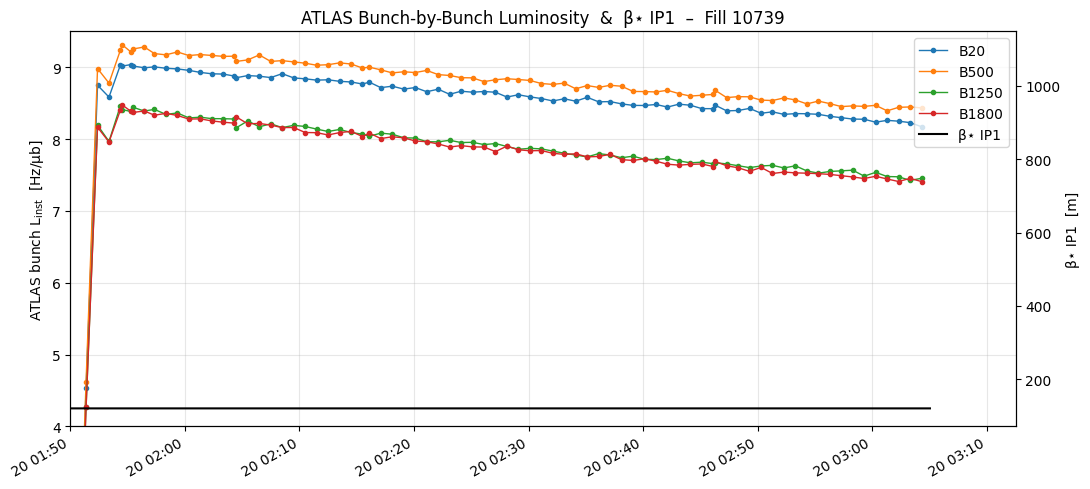

In [377]:

from pathlib import Path
import numpy as np
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt


parquet_path = Path(
    "/eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363"
    "/HX:FILLN=10739/"      
)

col_atlas = "ATLAS:BUNCH_LUMI_INST"        
col_bs    = "HX:BETASTAR_IP1"              
# Bunch IDs (BIDs) you want to plot
#bids = [20, 500, 1050, 1250, 1800, 2874]
bids = [20, 500, 1250, 1800] 

def load_bunch_array(column_name: str, bid_list):
    """Return a DataFrame with one column per BID (selected rows only)."""
    raw = (
        dd.read_parquet(parquet_path, columns=[column_name])
          .dropna()
          .compute()
    )
    raw.index = pd.to_datetime(raw.index, unit="ns")
    raw.sort_index(inplace=True)

    mat = np.stack(raw[column_name].values)      
    sliced = mat[:, bid_list]                    

    return pd.DataFrame(
        sliced,
        index   = raw.index,
        columns = [f"B{bid}" for bid in bid_list]
    )


df_atlas = load_bunch_array(col_atlas, bids)

df_bs = (
    dd.read_parquet(parquet_path, columns=[col_bs])
      .dropna()
      .compute()
)
df_bs.index = pd.to_datetime(df_bs.index, unit="ns")
df_bs.sort_index(inplace=True)


fig, ax_lumi = plt.subplots(figsize=(11, 5))

# All bunch curves (ATLAS)
df_atlas.plot(ax=ax_lumi, linewidth=1, marker=".", legend=True)
ax_lumi.set_ylabel("ATLAS bunch L$_{\\mathrm{inst}}$  [Hz/µb]")
ax_lumi.set_title("ATLAS Bunch-by-Bunch Luminosity  &  β⋆ IP1  –  Fill 10739")
ax_lumi.grid(alpha=0.3)

# β⋆ on secondary axis
ax_bs = ax_lumi.twinx()
df_bs[col_bs].plot(ax=ax_bs, color="black", linewidth=1.5, label="β⋆ IP1")
ax_bs.set_ylabel("β⋆ IP1  [m]")

# Optional: y-limits (uncomment / adjust)
ax_lumi.set_ylim(4, 9.5)
# ax_bs.set_ylim(113, 127)

# Combine legends from both axes
h1, l1 = ax_lumi.get_legend_handles_labels()
h2, l2 = ax_bs.get_legend_handles_labels()
ax_lumi.legend(h1 + h2, l1 + l2, loc="upper right")
start_time = pd.Timestamp("2025-06-20 01:50")   # adjust date if different
ax_lumi.set_xlim(left=start_time)
plt.tight_layout()
plt.show()


In [378]:


max_val  = df_atlas.max()        # highest value per bunch
max_time = df_atlas.idxmax()     # timestamp where it occurs

summary = pd.DataFrame({
    "Max_Lumi_Hz_per_ub": max_val,
    "Timestamp_UTC":      max_time
})

print("\n📈  Maximum instantaneous luminosity per bunch:")
print(summary)




📈  Maximum instantaneous luminosity per bunch:
       Max_Lumi_Hz_per_ub              Timestamp_UTC
B20              9.036981 2025-06-20 01:55:16.562112
B500             9.310138 2025-06-20 01:54:32.608467
B1250            8.466154 2025-06-20 01:54:22.323824
B1800            8.472777 2025-06-20 01:54:32.608467


##### subtraction

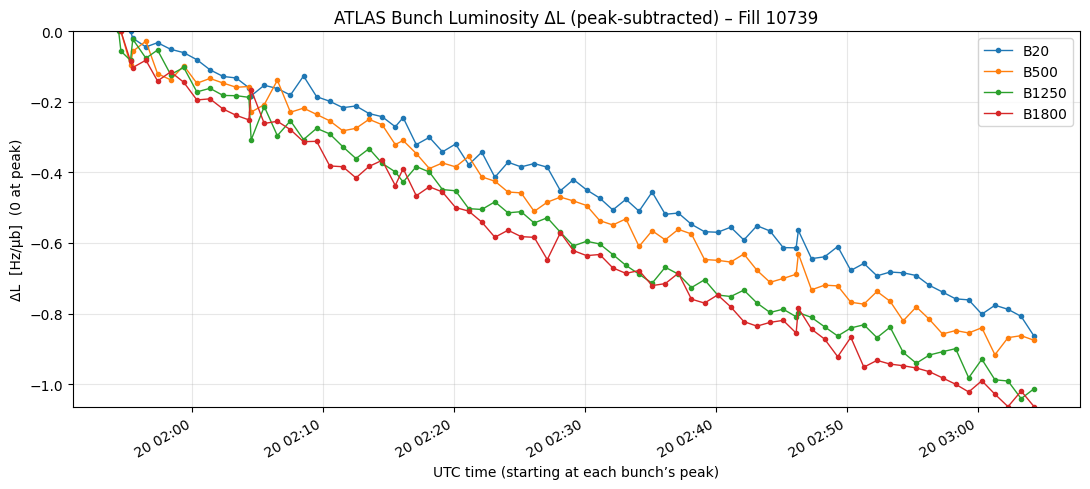

In [379]:
diff_frames = []
for col in df_atlas.columns:
    t0 = max_time[col]                       # peak timestamp for this bunch
    shifted = df_atlas.loc[t0:, col] - max_val[col]
    diff_frames.append(shifted.rename(col))  # keep column name

df_diff = pd.concat(diff_frames, axis=1)

fig, ax_diff = plt.subplots(figsize=(11, 5))

df_diff.plot(ax=ax_diff, linewidth=1, marker='.')
ax_diff.set_title("ATLAS Bunch Luminosity ΔL (peak-subtracted) – Fill 10739")
ax_diff.set_xlabel("UTC time (starting at each bunch’s peak)")
ax_diff.set_ylabel("ΔL  [Hz/µb]  (0 at peak)")
ax_diff.set_ylim(df_diff.min().min(), 0)     # y-axis from the most negative up to 0
ax_diff.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### division by maximum

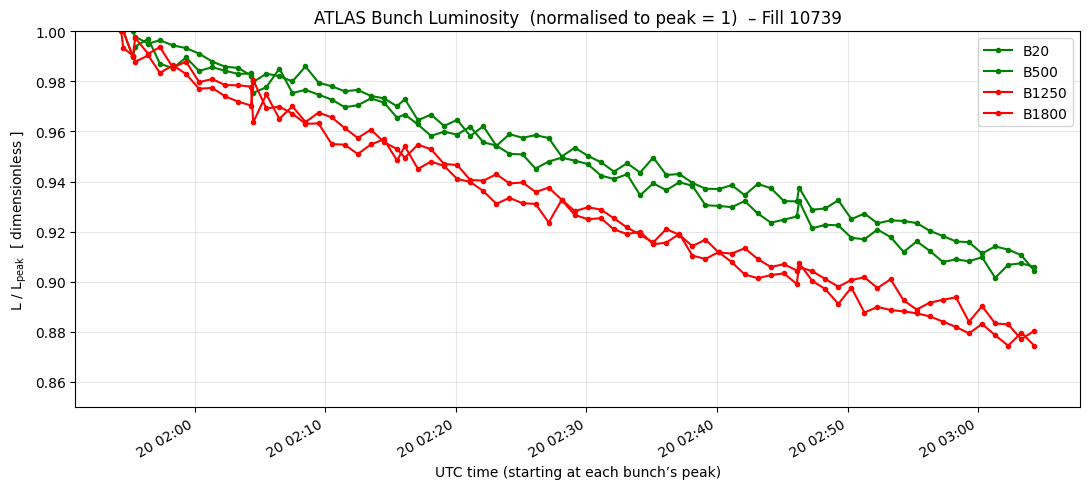

In [380]:
max_val  = df_atlas.max()          # peak L_inst per bunch
max_time = df_atlas.idxmax()       # timestamp of that peak

norm_frames = []
for col in df_atlas.columns:
    t0       = max_time[col]                   # peak time for this bunch
    norm_ser = df_atlas.loc[t0:, col] / max_val[col]
    norm_frames.append(norm_ser.rename(col))

df_norm = pd.concat(norm_frames, axis=1)

fig, ax_norm = plt.subplots(figsize=(11, 5))


for col in df_norm.columns:
    if col in ["B20", "B500"]:
        color = "green"
    else:
        color = "red"
    df_norm[col].plot(ax=ax_norm, linewidth=1.5, marker='.', label=col, color=color)

ax_norm.set_title("ATLAS Bunch Luminosity  (normalised to peak = 1)  – Fill 10739")
ax_norm.set_xlabel("UTC time (starting at each bunch’s peak)")
ax_norm.set_ylabel("L / L$_{\\mathrm{peak}}$  [ dimensionless ]")
ax_norm.set_ylim(0.85, 1.0)
ax_norm.grid(alpha=0.3)
ax_norm.legend(loc="upper right")

plt.tight_layout()
plt.show()


#### Statistics

In [381]:
from scipy.stats import linregress

# Dictionaries to store results
slopes = {}
half_lives = {}

for col in df_norm.columns:
    series = df_norm[col].dropna()

    if len(series) < 2:
        slopes[col] = None
        half_lives[col] = None
        continue
    t0 = series.index[0]
    window = series

    if len(window) >= 2:
        x_sec = (window.index - t0).total_seconds()
        y = window.values
        slope, *_ = linregress(x_sec, y)
        slopes[col] = slope
    else:
        slopes[col] = None

print("Decay slope (ΔL / Δt) over first 10 minutes:")
for col in df_norm.columns:
    s = slopes[col]
    print(f"{col:>5}: {s:.4e} [1/s]" if s is not None else f"{col:>5}: N/A")



Decay slope (ΔL / Δt) over first 10 minutes:
  B20: -2.1146e-05 [1/s]
 B500: -2.2120e-05 [1/s]
B1250: -2.7326e-05 [1/s]
B1800: -2.8086e-05 [1/s]


In [382]:
def percent_diff(val1, val2):
    """Return percentage difference between two values."""
    return abs(val1 - val2) / ((abs(val1) + abs(val2)) / 2) * 100
s_B20   = slopes.get("B20")
s_B500  = slopes.get("B500")
s_B1250 = slopes.get("B1250")
s_B1800 = slopes.get("B1800")

if None not in (s_B20, s_B500):
    diff_20_500 = percent_diff(s_B20, s_B500)
    print(f" B20 vs B500  difference:   {diff_20_500:.2f}%")
else:
    print("B20 or B500 slope missing")

if None not in (s_B1250, s_B1800):
    diff_1250_1800 = percent_diff(s_B1250, s_B1800)
    print(f"B1250 vs B1800 difference: {diff_1250_1800:.2f}%")
else:
    print( "B1250 or B1800 slope missing")


 B20 vs B500  difference:   4.50%
B1250 vs B1800 difference: 2.74%


In [383]:
def rms(vals):
    return np.sqrt(np.mean(np.square(vals)))

def percent_diff(val1, val2):
    return abs(val1 - val2) / ((abs(val1) + abs(val2)) / 2) * 100

# Group A: B20, B500
group_A = ["B20", "B500"]
slopes_A = [slopes[k] for k in group_A if slopes.get(k) is not None]

# Group B: B1250, B1800
group_B = ["B1250", "B1800"]
slopes_B = [slopes[k] for k in group_B if slopes.get(k) is not None]

# Mean and RMS
mean_A = np.mean(slopes_A)
rms_A  = rms(slopes_A)

mean_B = np.mean(slopes_B)
rms_B  = rms(slopes_B)

print(" Group A (B20, B500):")
print(f"  Mean slope: {mean_A:.4e} [1/s]")
print(f"  RMS  slope: {rms_A:.4e} [1/s]")

print("\n Group B (B1250, B1800):")
print(f"  Mean slope: {mean_B:.4e} [1/s]")
print(f"  RMS  slope: {rms_B:.4e} [1/s]")


 Group A (B20, B500):
  Mean slope: -2.1633e-05 [1/s]
  RMS  slope: 2.1638e-05 [1/s]

 Group B (B1250, B1800):
  Mean slope: -2.7706e-05 [1/s]
  RMS  slope: 2.7708e-05 [1/s]


In [384]:
from numpy import trapz

def percent_diff(val1, val2):
    return abs(val1 - val2) / ((abs(val1) + abs(val2)) / 2) * 100

def integrate_auc(series):
    """Numerical integration of normalized luminosity vs. time (seconds)."""
    x = (series.index - series.index[0]).total_seconds()
    y = series.values
    return trapz(y, x)
auc = {}
for col in df_norm.columns:
    auc[col] = integrate_auc(df_norm[col].dropna())

# Group A and B
group_A = ["B20", "B500"]
group_B = ["B1250", "B1800"]

auc_A = [auc[k] for k in group_A if k in auc]
auc_B = [auc[k] for k in group_B if k in auc]

mean_auc_A = np.mean(auc_A)
mean_auc_B = np.mean(auc_B)

diff_auc_pct = percent_diff(mean_auc_A, mean_auc_B)

# Print results
print("Integrated AUC (area under normalized L) per group:")
print(f"  Group A mean AUC: {mean_auc_A:.2f} s")
print(f"  Group B mean AUC: {mean_auc_B:.2f} s")
print(f"\nPercent difference in AUC (A vs B): {diff_auc_pct:.2f}%")


Integrated AUC (area under normalized L) per group:
  Group A mean AUC: 3954.55 s
  Group B mean AUC: 3900.13 s

Percent difference in AUC (A vs B): 1.39%


/tmp/ipykernel_1457562/571408396.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return trapz(y, x)


# CMS

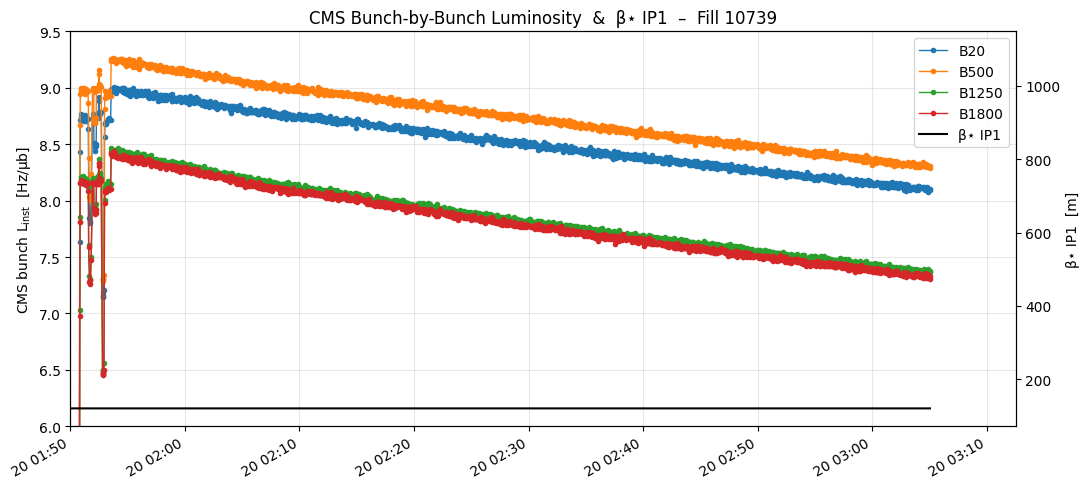

In [385]:

parquet_path = Path(
    "/eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363"
    "/HX:FILLN=10739/"      
)

col_atlas = "CMS:BUNCH_LUMI_INST"        
col_bs    = "HX:BETASTAR_IP1"              
# Bunch IDs (BIDs) you want to plot
#bids = [20, 500, 1050, 1250, 1800, 2874]
bids = [20, 500, 1250, 1800] 

def load_bunch_array(column_name: str, bid_list):
    """Return a DataFrame with one column per BID (selected rows only)."""
    raw = (
        dd.read_parquet(parquet_path, columns=[column_name])
          .dropna()
          .compute()
    )
    raw.index = pd.to_datetime(raw.index, unit="ns")
    raw.sort_index(inplace=True)

    mat = np.stack(raw[column_name].values)      
    sliced = mat[:, bid_list]                    

    return pd.DataFrame(
        sliced,
        index   = raw.index,
        columns = [f"B{bid}" for bid in bid_list]
    )


df_atlas = load_bunch_array(col_atlas, bids)

df_bs = (
    dd.read_parquet(parquet_path, columns=[col_bs])
      .dropna()
      .compute()
)
df_bs.index = pd.to_datetime(df_bs.index, unit="ns")
df_bs.sort_index(inplace=True)


fig, ax_lumi = plt.subplots(figsize=(11, 5))

df_atlas.plot(ax=ax_lumi, linewidth=1, marker=".", legend=True)
ax_lumi.set_ylabel("CMS bunch L$_{\\mathrm{inst}}$  [Hz/µb]")
ax_lumi.set_title("CMS Bunch-by-Bunch Luminosity  &  β⋆ IP1  –  Fill 10739")
ax_lumi.grid(alpha=0.3)

# β⋆ on secondary axis
ax_bs = ax_lumi.twinx()
df_bs[col_bs].plot(ax=ax_bs, color="black", linewidth=1.5, label="β⋆ IP1")
ax_bs.set_ylabel("β⋆ IP1  [m]")

# Optional: y-limits (uncomment / adjust)
ax_lumi.set_ylim(6, 9.5)
# ax_bs.set_ylim(113, 127)

# Combine legends from both axes
h1, l1 = ax_lumi.get_legend_handles_labels()
h2, l2 = ax_bs.get_legend_handles_labels()
ax_lumi.legend(h1 + h2, l1 + l2, loc="upper right")
start_time = pd.Timestamp("2025-06-20 01:50")   # adjust date if different
ax_lumi.set_xlim(left=start_time)
plt.tight_layout()
plt.show()


In [386]:
max_val  = df_cms.max()        # highest value per bunch
max_time = df_cms.idxmax()     # timestamp where it occurs

summary = pd.DataFrame({
    "Max_Lumi_Hz_per_ub": max_val,
    "Timestamp_UTC":      max_time
})

print("\n  Maximum instantaneous luminosity per bunch:")
print(summary)



  Maximum instantaneous luminosity per bunch:
       Max_Lumi_Hz_per_ub           Timestamp_UTC
B20              9.007601 2025-06-20 01:53:48.397
B500             9.261513 2025-06-20 01:53:41.071
B1050            0.000580 2025-06-20 01:51:21.226
B1250            8.468493 2025-06-20 01:53:33.836
B1800            8.442728 2025-06-20 01:53:48.397
B2874            5.025357 2025-06-20 01:53:35.260


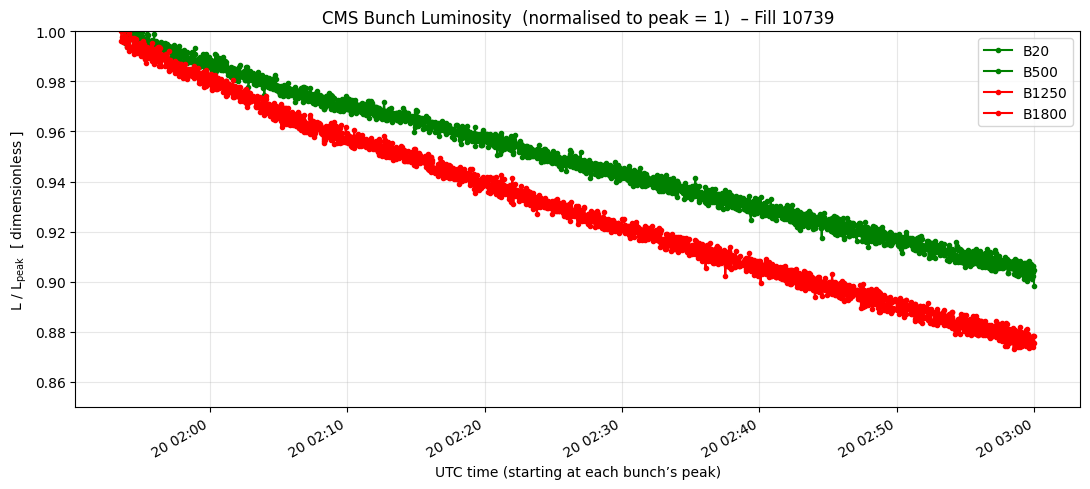

In [387]:
selected_bunches = ["B20", "B500", "B1250", "B1800"]
max_val  = df_cms[selected_bunches].max()
max_time = df_cms[selected_bunches].idxmax()

norm_frames = []
for col in selected_bunches:
    t0       = max_time[col]                
    norm_ser = df_cms.loc[t0:, col] / max_val[col]
    norm_frames.append(norm_ser.rename(col))

df_norm = pd.concat(norm_frames, axis=1)

fig, ax_norm = plt.subplots(figsize=(11, 5))

for col in selected_bunches:
    color = "green" if col in ["B20", "B500"] else "red"
    df_norm[col].plot(ax=ax_norm, linewidth=1.5, marker='.', label=col, color=color)

ax_norm.set_title("CMS Bunch Luminosity  (normalised to peak = 1)  – Fill 10739")
ax_norm.set_xlabel("UTC time (starting at each bunch’s peak)")
ax_norm.set_ylabel("L / L$_{\\mathrm{peak}}$  [ dimensionless ]")
ax_norm.set_ylim(0.85, 1.00)
ax_norm.grid(alpha=0.3)
ax_norm.legend(loc="upper right")

plt.tight_layout()
plt.show()


#### statistics for CMS

In [388]:
from scipy.stats import linregress

# Dictionaries to store results
slopes = {}
half_lives = {}

for col in df_norm.columns:
    series = df_norm[col].dropna()

    if len(series) < 2:
        slopes[col] = None
        half_lives[col] = None
        continue
    t0 = series.index[0]
    window = series

    if len(window) >= 2:
        x_sec = (window.index - t0).total_seconds()
        y = window.values
        slope, *_ = linregress(x_sec, y)
        slopes[col] = slope
    else:
        slopes[col] = None

print("Decay slope (ΔL / Δt) over first 10 minutes:")
for col in df_norm.columns:
    s = slopes[col]
    print(f"{col:>5}: {s:.4e} [1/s]" if s is not None else f"{col:>5}: N/A")


Decay slope (ΔL / Δt) over first 10 minutes:
  B20: -2.2903e-05 [1/s]
 B500: -2.3568e-05 [1/s]
B1250: -2.9254e-05 [1/s]
B1800: -2.9570e-05 [1/s]


In [389]:
def percent_diff(val1, val2):
    """Return percentage difference between two values."""
    return abs(val1 - val2) / ((abs(val1) + abs(val2)) / 2) * 100
s_B20   = slopes.get("B20")
s_B500  = slopes.get("B500")
s_B1250 = slopes.get("B1250")
s_B1800 = slopes.get("B1800")

if None not in (s_B20, s_B500):
    diff_20_500 = percent_diff(s_B20, s_B500)
    print(f" B20 vs B500  difference:   {diff_20_500:.2f}%")
else:
    print("B20 or B500 slope missing")

if None not in (s_B1250, s_B1800):
    diff_1250_1800 = percent_diff(s_B1250, s_B1800)
    print(f"B1250 vs B1800 difference: {diff_1250_1800:.2f}%")
else:
    print( "B1250 or B1800 slope missing")


 B20 vs B500  difference:   2.86%
B1250 vs B1800 difference: 1.08%


In [390]:
def rms(vals):
    return np.sqrt(np.mean(np.square(vals)))

def percent_diff(val1, val2):
    return abs(val1 - val2) / ((abs(val1) + abs(val2)) / 2) * 100

# Group A: B20, B500
group_A = ["B20", "B500"]
slopes_A = [slopes[k] for k in group_A if slopes.get(k) is not None]

# Group B: B1250, B1800
group_B = ["B1250", "B1800"]
slopes_B = [slopes[k] for k in group_B if slopes.get(k) is not None]

# Mean and RMS
mean_A = np.mean(slopes_A)
rms_A  = rms(slopes_A)

mean_B = np.mean(slopes_B)
rms_B  = rms(slopes_B)

print(" Group A (B20, B500):")
print(f"  Mean slope: {mean_A:.4e} [1/s]")
print(f"  RMS  slope: {rms_A:.4e} [1/s]")

print("\n Group B (B1250, B1800):")
print(f"  Mean slope: {mean_B:.4e} [1/s]")
print(f"  RMS  slope: {rms_B:.4e} [1/s]")


 Group A (B20, B500):
  Mean slope: -2.3235e-05 [1/s]
  RMS  slope: 2.3238e-05 [1/s]

 Group B (B1250, B1800):
  Mean slope: -2.9412e-05 [1/s]
  RMS  slope: 2.9412e-05 [1/s]


In [391]:
from numpy import trapz

def percent_diff(val1, val2):
    return abs(val1 - val2) / ((abs(val1) + abs(val2)) / 2) * 100

def integrate_auc(series):
    """Numerical integration of normalized luminosity vs. time (seconds)."""
    x = (series.index - series.index[0]).total_seconds()
    y = series.values
    return trapz(y, x)
auc = {}
for col in df_norm.columns:
    auc[col] = integrate_auc(df_norm[col].dropna())

# Group A and B
group_A = ["B20", "B500"]
group_B = ["B1250", "B1800"]

auc_A = [auc[k] for k in group_A if k in auc]
auc_B = [auc[k] for k in group_B if k in auc]

mean_auc_A = np.mean(auc_A)
mean_auc_B = np.mean(auc_B)

diff_auc_pct = percent_diff(mean_auc_A, mean_auc_B)

# Print results
print("Integrated AUC (area under normalized L) per group:")
print(f"  Group A mean AUC: {mean_auc_A:.2f} s")
print(f"  Group B mean AUC: {mean_auc_B:.2f} s")
print(f"\nPercent difference in AUC (A vs B): {diff_auc_pct:.2f}%")


Integrated AUC (area under normalized L) per group:
  Group A mean AUC: 3769.22 s
  Group B mean AUC: 3699.47 s

Percent difference in AUC (A vs B): 1.87%


/tmp/ipykernel_1457562/571408396.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return trapz(y, x)


In [392]:
DATADIR = Path('/eos/project/l/lhc-lumimod/LuminosityFollowUp/md_data/MD15363/HX:FILLN=10739/')
fbmodes = pd.read_parquet(DATADIR)
fbmodes
[x for x in fbmodes.columns if x.find('LUMI')>0]



['ATLAS:LUMI_TOT_INST',
 'CMS:LUMI_TOT_INST',
 'ATLAS:BUNCH_LUMI_INST',
 'CMS:BUNCH_LUMI_INST',
 'CMS:LUMI_REGION_SIZE_X',
 'CMS:LUMI_REGION_SIZE_Y',
 'CMS:LUMI_REGION_SIZE_Z',
 'UCAP.LHC.LUMI.LOSSES:EffectiveCrossSectionPerBunch:effectiveCrossSectionB1',
 'UCAP.LHC.LUMI.LOSSES:EffectiveCrossSectionPerBunch:effectiveCrossSectionB2']